In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

class AlexNet(nn.Module):
    def __init__(self, num_classes: int = 10, dropout: float = 0.5) -> None:
        super().__init__()
        # _log_api_usage_once(self)
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(256*6*6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 10),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


GPU is available and being used


In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader, random_split

#Resizing the mnist dataset
transform = transforms.Compose([
    transforms.Resize((64)),
    # transforms.CenterCrop(224),
    transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

#cownloadind the MNIST dataset
train_dataset = CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = CIFAR10(root='./data', train=False, transform=transform)

#creating dataloaders
batch_size = 1000
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.size()


Files already downloaded and verified


torch.Size([1000, 3, 64, 64])

In [ ]:
len(train_dataset)

50000

In [ ]:
len(test_dataset)

10000

In [ ]:
len(train_loader)

50

In [ ]:
len(test_loader)

10

In [ ]:
model = AlexNet().to(device)
learning_rate=0.001
#Setting the loss function
cost = nn.CrossEntropyLoss()

#Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
num_epochs=30
total_step = len(train_loader)
train_losses = []
train_accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0


    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        #Forward pass
        outputs = model(images)
        # outputs=torch.res
        # print(outputs.shape)
        # newlabels=torch.eye(10)[labels]
        loss = cost(outputs, labels)

        # Backward and optimize

        loss.backward()
        optimizer.step()
        # print(i)
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)

        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
        # print((predicted == labels).sum().item())
        # print(labels.size(0))
    #computing the average loss and accuracy for this epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct_predictions / total_predictions

    #Storing loss
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

Epoch [1/100], Loss: 2.4239, Accuracy: 12.34%
Epoch [2/100], Loss: 1.9996, Accuracy: 22.02%
Epoch [3/100], Loss: 1.6990, Accuracy: 32.16%
Epoch [4/100], Loss: 1.5554, Accuracy: 39.85%
Epoch [5/100], Loss: 1.4189, Accuracy: 46.75%
Epoch [6/100], Loss: 1.2960, Accuracy: 52.85%
Epoch [7/100], Loss: 1.1715, Accuracy: 57.80%
Epoch [8/100], Loss: 1.0819, Accuracy: 61.20%
Epoch [9/100], Loss: 0.9883, Accuracy: 64.93%
Epoch [10/100], Loss: 0.9379, Accuracy: 66.66%
Epoch [11/100], Loss: 0.8739, Accuracy: 69.00%
Epoch [12/100], Loss: 0.8201, Accuracy: 71.15%
Epoch [13/100], Loss: 0.7603, Accuracy: 73.54%
Epoch [14/100], Loss: 0.7304, Accuracy: 74.51%
Epoch [15/100], Loss: 0.6828, Accuracy: 76.17%
Epoch [16/100], Loss: 0.6187, Accuracy: 78.43%
Epoch [17/100], Loss: 0.5959, Accuracy: 79.05%
Epoch [18/100], Loss: 0.5523, Accuracy: 80.80%
Epoch [19/100], Loss: 0.5132, Accuracy: 81.97%
Epoch [20/100], Loss: 0.4700, Accuracy: 83.49%
Epoch [21/100], Loss: 0.4313, Accuracy: 84.94%
Epoch [22/100], Loss: 

In [ ]:
accuracy

98.248

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 66.8 %


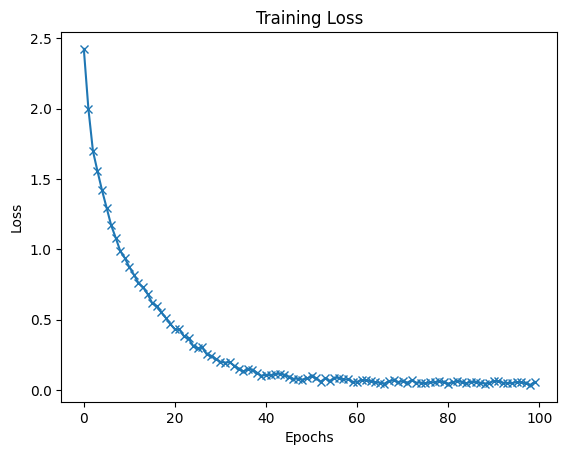

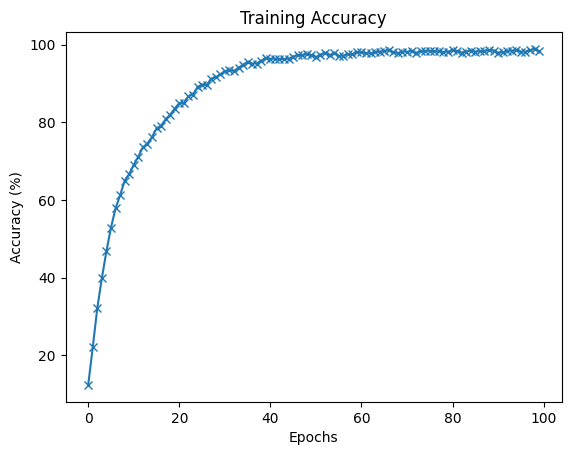

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses, '-x')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(train_accuracies, '-x')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.show()

In [ ]:
train_accuracies

[12.336,
 22.016,
 32.158,
 39.846,
 46.752,
 52.852,
 57.796,
 61.196,
 64.926,
 66.664,
 69.002,
 71.146,
 73.538,
 74.514,
 76.166,
 78.432,
 79.052,
 80.796,
 81.97,
 83.486,
 84.938,
 84.892,
 86.73,
 87.12,
 89.088,
 89.732,
 89.518,
 91.258,
 91.582,
 92.346,
 93.108,
 93.34,
 93.232,
 94.046,
 94.856,
 95.516,
 95.136,
 95.136,
 95.91,
 96.564,
 96.326,
 96.414,
 96.322,
 96.278,
 96.386,
 96.898,
 97.292,
 97.304,
 97.56,
 97.314,
 96.812,
 97.384,
 97.964,
 97.26,
 97.89,
 97.108,
 97.18,
 97.546,
 97.522,
 98.104,
 98.074,
 97.78,
 97.796,
 98.002,
 98.216,
 98.38,
 98.532,
 98.042,
 97.838,
 98.194,
 98.156,
 98.36,
 97.898,
 98.37,
 98.362,
 98.45,
 98.262,
 98.252,
 98.074,
 98.228,
 98.496,
 98.242,
 97.932,
 98.222,
 98.488,
 98.218,
 98.29,
 98.43,
 98.512,
 98.462,
 97.972,
 98.002,
 98.4,
 98.448,
 98.566,
 98.204,
 98.216,
 98.538,
 98.898,
 98.248]

In [ ]:
correct_predictions

49124

In [ ]:
total_predictions

50000

In [ ]:
max(train_accuracies)

98.898